## Predictors of Domestic Violence in Washington, D.C.

Contributors: Seoho Hahm, Allison Lee

### Table of Contents
1. <a href='#prob'>Problem Statement
2. <a href='#sources'>Data Sources</a>
3. <a href='#approach'>Approach</a>
4. <a href='#eda'>Exploratory Data Analysis</a>
5. <a href='#feature'>Feature Selection</a>
6. <a href='#reg'>Regression</a>
7. <a href='#analysis'>Findings and Analysis</a>
8. <a href='#concl'>Conclusions and Recommendations</a>

In [70]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
%run ../pyfiles/data_cleaning
%run ../pyfiles/regression

<a id='prob'></a>
### Problem Statement

This analysis seeks to understand which factors are most efficient in predicting domestic violence in cities such as Washington, D.C. 

Specifically, we look at the strength and contribution of different variables to incidents of domestic violence in Washington, D.C., and the potential interactions between variables. 

<a id='sources'></a>
### Data Sources

We use a dataset of 101 features and 431 observations from a study conducted by Caterina Goman from the Urban Institute, "Alcohol Availability, Type of Alcohol Establishment, Distribution Policies, and Their Relationship to Crime and Disorder in the District of Columbia, 2000-2006". Each observation represents a block in Washington, D.C. 

The original dataset is available here: https://www.icpsr.umich.edu/icpsrweb/NACJD/studies/25763/summary

<a id='approach'></a>
### Approach

We take a more statistical approach to this analysis to understand which factors are most efficient at predicting incidents of domestic violence in Washington, D.C. All of our features are continuous. 

We used Cook's D to assess leverage and outliers in our variables. 

We used three different methods for feature selection--recursive feature elimination, domain knowledge / forward selection, and Lasso regression. We ran models on the resulting features and compared model metrics. We selected our final model based on the metrics of XXXXXX. 

We then checked the residual plots to ensure they met our assumptions of normal distribution and homoscedasticity. 

Finally, we present our main findings and recommendations. 

<a id='eda'></a>
### Exploratory Data Analysis

In [71]:
df = pd.read_csv('../data/data.tsv', sep = '\t')
df = clean_orig_dataset(df)
X = df.drop('AVGDV', axis = 1)
y = df['AVGDV']

box plots

if time:
We use Cook's D to understand ....

<a id='feature'></a<
### Feature Selection

As a first step, we removed the features that are directly correlated with our dependent variable (for example, domestic violence incidents on the weekend). We tried three methods of feature selection to come up with a subset of features on which to run a model. 

**Recursive Feature Elimination**

First, we tried recursive feature elimination. In our case, recursive feature elimination works by recursively selecting smaller and smaller sets of features. The importance of each feature is obtained through the linear regression coefficient attribute (we scaled the features before inputting them in the rfe model). After initially training on the original set of features, the rfe "prunes" the least important features and repeats this process until the desired number of features is reached. We set our desired number of features as 7 for ease of interpretation. 

In [72]:
# scale dataframe
scaled_df = scale_dataset(X)
rfe_df = recursive_feature_elimination(scaled_df, X, y)

The model returned the following six features: 'POP2004', 'WHITE', 'BLACK', 'ONPREM_BG', 'AVGMPDDIS', 'AVGADW0001'

After checking for multicollinearity, we remove one additional variable (reports of assaults with a deadly weapon) which has a correlation coefficient higher than 0.7 with AVGMPDDIS (reports of disturbance).

In [73]:
# drop due to multicollinearity
rfe_df.drop('AVGADW0001', axis = 1, inplace = True)

**Lasso Regression**

After standardizing our features, we select a subset of features using Lasso Regression (an embedded method). We tried this approach because we are interested in the importance of the features, and there is a high degree of multicollinearity within our features given the size of our dataset. 

In [74]:
lasso_df = run_lasso(df, scaled_df, y)
lasso_df.columns

Index(['VACANTPERCENT', 'BLACK', 'AGE_5_17', 'VACANT', 'FEMALE', 'YOUNGPOP',
       'PUBHOUSPT', 'AVGMPDDIS', 'AVGADW0001', 'ADWWEEKEND', 'ADWWEEKNIGHT',
       'ARR_0506'],
      dtype='object')

The Lasso method returned the following twelve variables:'VACANTPERCENT', 'BLACK', 'AGE_5_17', 'VACANT', 'FEMALE', 'YOUNGPOP','PUBHOUSPT', 'AVGMPDDIS', 'AVGADW0001', 'ADWWEEKEND', 'ADWWEEKNIGHT','ARR_0506'.
However, there appears to be a high degree of multicollinearity between them, as shown by the visualization below. 

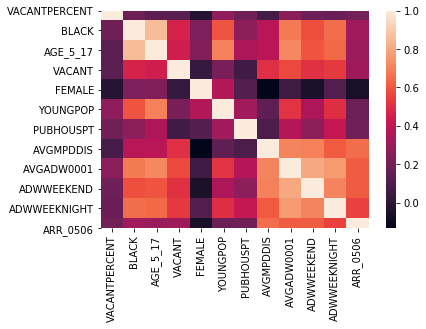

In [75]:
sns.heatmap(lasso_df.corr())

We therefore further removed variables due to multicollinearity. 

In [76]:
lasso_final_df = lasso_remove_multicollinearity(lasso_df)

**Forward Selection**

In this method, we started with all variables in the model, and selected a subset of variables with the lowest p-values. We then added these variables to our model one by one, until we reached a limit where one became insignificant. 

In [77]:
forward_df = forward_selection(scaled_df)

The correlation matrix shows that there are no variables with a correlation coefficient above 0.7.

<a id='reg'><a/>
### Multiple Linear Regression

We employ multiple linear regression with average incidents of domestic violence over 2005 to 2006 as our dependent variable. Multiple linear regression models make the following assumptions:
 - a linear relationship between the predictor variables and the dependent variable
 - the residuals are normally distributed
 - independent variables are not highly correlated with each other
 - homoscedasticity of the variance of error terms when plotted against independent variables

We run three different models using the three outputs of our feature selection methods. 

We compared the models using the Adjusted R squared metric, which is adjusted for the number of variables in the model. Our findings are summarized below:
 - Recursive elimination feature: 0.860
 - Lasso regression: 0.866
 - Forward selection: 0.421
 


Recursive elimination feature and lasso regression methods returned similar adjusted R values when those subset of features were run in a multiple regression model. 

<a id='findings'></a>
### Findings

In [83]:
run_model(rfe_df, y)

                                 OLS Regression Results                                
Dep. Variable:                  AVGDV   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              534.8
Date:                Wed, 04 Dec 2019   Prob (F-statistic):                   1.61e-194
Time:                        11:36:10   Log-Likelihood:                         -1701.8
No. Observations:                 431   AIC:                                      3416.
Df Residuals:                     425   BIC:                                      3440.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#
 - Run a couple of models
 - Look at features and coefficients 
 - Focus on features - which ones are more dominant, how are they interacting. understand importance of features, effects of domestic violence. which are most efficient in predicting dv.
 - Ratio BG / population
 - already have some sort of bias if you only chose 6 features. 
 - run a huge model, compare models, look at coefficients p values and f scores. 
 - rsq not super important, but p value, f scores. 
  - is there a significant different --> statistical realm. Anova test. 
  - but also use linear regression model
  - read paper